In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
np.random.seed(4)

# Step 1: Generate actual values (linear trend or random)
n = 1000
y_actual = np.linspace(50, 150, n)  # linear increasing target

# Step 2: Add normally distributed noise to simulate prediction errors
errors = np.random.normal(loc=0, scale=5, size=n)  # mean 0, std dev 5
y_pred = y_actual + errors

# Step 3: Create DataFrame
df = pd.DataFrame({
    'y_actual': y_actual,
    'y_pred': y_pred,
    'error': y_pred - y_actual
})

In [13]:
df

,y_actual,y_pred,error
0,50.0000,50.252809,0.252809
1,50.1001,52.599857,2.499757
2,50.2002,45.220656,-4.979545
3,50.3003,53.768293,3.467993
4,50.4004,48.308893,-2.091508
...,...,...,...
995,149.5996,148.762336,-0.837263
996,149.6997,158.104595,8.404895
997,149.7998,145.657155,-4.142645
998,149.8999,151.746825,1.846925


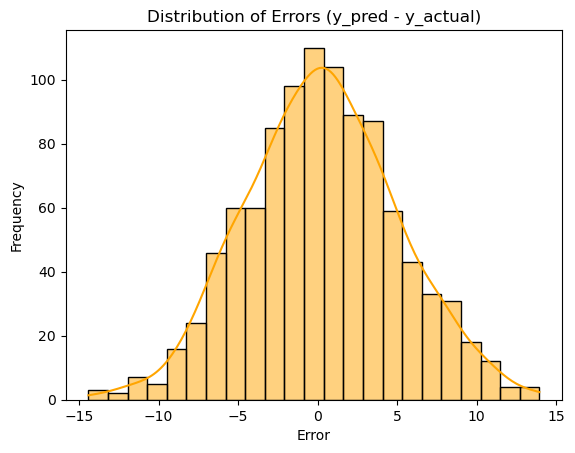

In [15]:
# Plot distribution of error
sns.histplot(df['error'], kde=True, color='orange')
plt.title("Distribution of Errors (y_pred - y_actual)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Why outliers are an issue

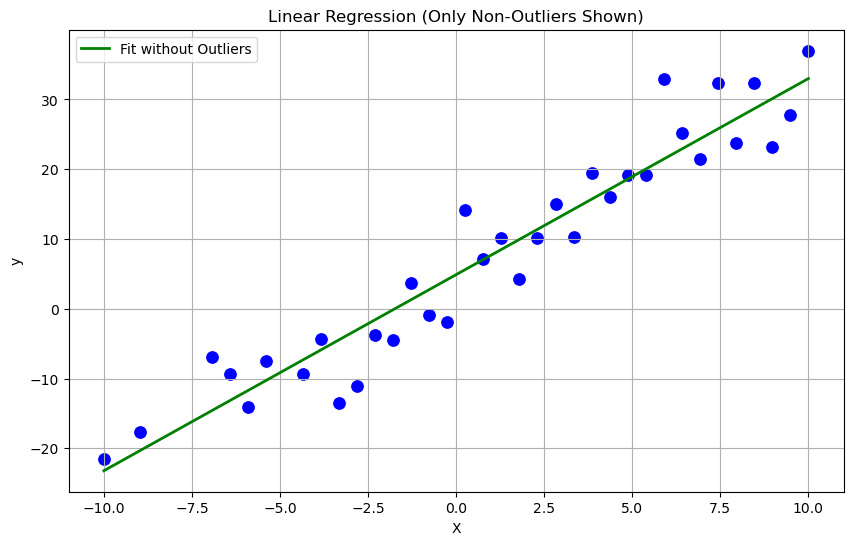

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Generate linear data with 40 points
np.random.seed(42)
n_total = 40
X = np.linspace(-10, 10, n_total)
noise = np.random.normal(1, 5, n_total)
y = 3 * X + 5 + noise

# Step 2: Introduce 5 outliers
outlier_indices = np.random.choice(n_total, size=5, replace=False)
y[outlier_indices] += np.random.choice([-140, -125, -100, -90, -130], size=5)

# Step 3: Create DataFrame
df = pd.DataFrame({'X': X, 'y': y})
df['is_outlier'] = df.index.isin(outlier_indices)

# Step 4: Fit linear regression *excluding* outliers
X_filtered = df.loc[~df['is_outlier'], 'X']
y_filtered = df.loc[~df['is_outlier'], 'y']
X_filtered_ = sm.add_constant(X_filtered)
model_filtered = sm.OLS(y_filtered, X_filtered_).fit()

# Predict for full X range using the fitted model
y_pred_filtered = model_filtered.predict(sm.add_constant(df['X']))

# Step 5: Plot only non-outliers
df_clean = df[~df['is_outlier']].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='X', y='y', color='blue', s=100)
plt.plot(df['X'], y_pred_filtered, color='green', linewidth=2, label='Fit without Outliers')
plt.title("Linear Regression (Only Non-Outliers Shown)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


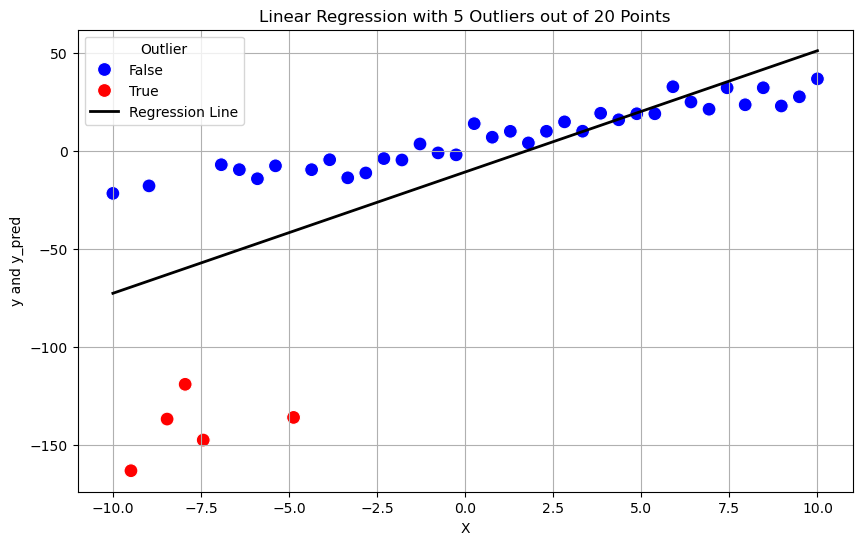

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Generate linear data with 20 points
np.random.seed(42)
n_total = 40
X = np.linspace(-10, 10, n_total)
noise = np.random.normal(1, 5, n_total)
y = 3 * X + 5 + noise

# Step 2: Randomly pick 5 indices to be outliers
outlier_indices = np.random.choice(n_total, size=5, replace=False)
y[outlier_indices] += np.random.choice([-140, -125, -100, -90, -130], size=5)  # Add significant deviation

# Step 3: Fit linear regression using statsmodels
X_ = sm.add_constant(X)
model = sm.OLS(y, X_).fit()
y_pred = model.predict(X_)

# Step 4: Create DataFrame
df = pd.DataFrame({
    'X': X,
    'y': y,
    'y_pred': y_pred
})
df['error'] = df['y_pred'] - df['y']
df['is_outlier'] = df.index.isin(outlier_indices)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X', y='y', hue='is_outlier', palette={True: 'red', False: 'blue'}, s=100)
plt.plot(X, y_pred, color='black', linewidth=2, label='Regression Line')
plt.title("Linear Regression with 5 Outliers out of 20 Points")
plt.xlabel("X")
plt.ylabel("y and y_pred")
plt.legend(title="Outlier")
plt.grid(True)
plt.show()